In [1]:
%matplotlib inline

import matplotlib
import matplotlib.colors as colors

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
import sys
import gzip
import matplotlib.gridspec as gridspec

matplotlib.rcParams.update({'font.family':'cmr10','font.size': 13})
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['axes.labelsize']=15
plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [2]:
data = np.load('StarsWithRadialVelocity.npy')

In [3]:
data_cols = ['l', 'b','ra', 'dec', 'pmra', 'pmdec', 'parallax', 'radial_velocity',
             'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
             'pmra_error', 'pmdec_error', 'parallax_error', 'radial_velocity_error',
             'phot_g_mean_mag_error', 'phot_bp_mean_mag_error', 'phot_rp_mean_mag_error',
             'AccretedLabel'
            ]

In [4]:
data = pd.DataFrame(data, columns=data_cols)

In [5]:
data.head()

,l,b,ra,dec,pmra,pmdec,parallax,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,pmra_error,pmdec_error,parallax_error,radial_velocity_error,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,AccretedLabel
0,18.947771,17.087326,261.281075,-4.105546,0.304014,-2.012651,0.443537,44.472788,14.384683,14.678857,13.931516,0.091557,0.091557,0.044116,9.908263,0.000611,0.003929,0.003929,0.0
1,-4.978819,-41.542610,315.656827,-45.372252,15.768343,-16.975898,1.369992,-120.045033,12.405884,12.633657,12.030871,0.087001,0.087001,0.042780,2.036502,0.000342,0.002105,0.002105,0.0
2,-137.539419,-47.311996,60.814237,-25.789371,5.542696,9.388474,0.597262,83.063864,14.347357,14.619976,13.923520,0.091365,0.091365,0.044055,9.917098,0.000602,0.003861,0.003861,0.0
3,-68.315598,-32.353069,71.998054,-78.933526,14.320530,-13.669455,0.862436,-106.062495,14.062039,14.311761,13.648176,0.090130,0.090130,0.043668,7.792049,0.000544,0.003407,0.003407,0.0
4,85.879721,-52.988838,351.547535,3.638489,2.937268,5.109022,1.510236,-23.143291,14.677980,15.082906,14.107460,0.093275,0.093275,0.044678,11.110764,0.000683,0.004529,0.004529,0.0


In [6]:
from matplotlib.colors import LogNorm

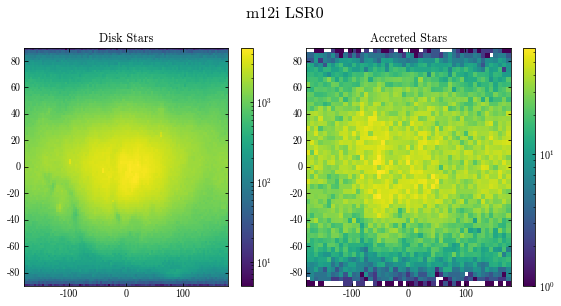

In [7]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist2d(data.query('AccretedLabel == 0')['l'],
           data.query('AccretedLabel == 0')['b'],
           bins=(np.linspace(-180, 180, 100),
                 np.linspace(-90, 90, 100)
                ),
           norm=LogNorm()
          )
plt.title('Disk Stars')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.hist2d(data.query('AccretedLabel == 1')['l'],
           data.query('AccretedLabel == 1')['b'],
           bins=(np.linspace(-180, 180, 50),
                 np.linspace(-90, 90, 50)
                ),
           norm=LogNorm()
          )
plt.title('Accreted Stars')
plt.colorbar()

plt.tight_layout()
plt.suptitle('m12i LSR0', y=1.05, fontsize=16)
plt.show()

In [8]:
np.histogram(data['l'])

(array([ 795239,  879566, 1025167, 1363591, 1527876, 1652809, 1417680,
        1070783,  871603,  796532]),
 array([-1.79999980e+02, -1.43999982e+02, -1.07999984e+02, -7.19999863e+01,
        -3.59999886e+01,  9.13040577e-06,  3.60000069e+01,  7.20000046e+01,
         1.08000002e+02,  1.44000000e+02,  1.79999998e+02]))

In [9]:
np.histogram2d(data['l'], data['b'])

(array([[ 13263.,  39351.,  67446., 108439., 150758., 150898., 119426.,
          83379.,  47207.,  15072.],
        [ 13543.,  40093.,  74878., 129733., 153048., 183283., 140918.,
          85803.,  43590.,  14677.],
        [ 13801.,  38924.,  80994., 134000., 202935., 234473., 166251.,
          94492.,  44682.,  14615.],
        [ 13743.,  44426., 112014., 213858., 299757., 303513., 203505.,
         107242.,  50415.,  15118.],
        [ 13737.,  49368., 118016., 243605., 350900., 334990., 228162.,
         118841.,  54268.,  15989.],
        [ 14849.,  53807., 111717., 251929., 405042., 377476., 239241.,
         124244.,  57659.,  16845.],
        [ 15770.,  52510., 112553., 210302., 316091., 317745., 210276.,
         112502.,  53843.,  16088.],
        [ 17863.,  48092.,  92799., 154307., 207994., 226365., 168269.,
          92266.,  47708.,  15120.],
        [ 14826.,  44886.,  81787., 118094., 155276., 167924., 142240.,
          86049.,  45578.,  14943.],
        [ 13125.,  

In [10]:
np.histogram2d?

Signature:
np.histogram2d(
    x,
    y,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the bi-dimensional histogram of two data samples.

Parameters
----------
x : array_like, shape (N,)
    An array containing the x coordinates of the points to be
    histogrammed.
y : array_like, shape (N,)
    An array containing the y coordinates of the points to be
    histogrammed.
bins : int or array_like or [int, int] or [array, array], optional
    The bin specification:

      * If int, the number of bins for the two dimensions (nx=ny=bins).
      * If array_like, the bin edges for the two dimensions
        (x_edges=y_edges=bins).
      * If [int, int], the number of bins in each dimension
        (nx, ny = bins).
      * If [array, array], the bin edges in each dimension
        (x_edges, y_edges = bins).
      * A combination [int, array] or [array, int], where int
        is the number of bins and array is the bin edges.

range : ar